# **Vehicle Silhouette Classification Project**


---

Prospect Auto, a chain of car repair shops, requested a supervised machine learning model to classify bus, van, and car vehicles based on geometric features extracted from their silhouettes.

The goal is to build, evaluate, and interpret a model capable of accurately distinguishing between the three vehicle types, ensuring reliable classification for operational efficiency.

This project aims to deliver a reliable classification model for real-world use. Evaluation focuses on the F1-score, the most relevant metric to ensure balanced performance across all vehicle categories.

---



## 1. **Import & Setup**


###1.1 **Import Libraries**

In [79]:
# Importing the libraries

# Data Handling & Analysis
# ---------------------------------------------
import pandas as pd # Data manipulation and loading
import numpy as np # Numerical computations

# Visualization
# ---------------------------------------------
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical visualizations

# Data Preprocessing
# ---------------------------------------------
from sklearn.preprocessing import StandardScaler # Feature scaling (mean=0, std=1)
from sklearn.impute import SimpleImputer # Imputation of missing values (median, mean, etc.)

# Train/Test Split & Evaluation
# ---------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score # Dataset splitting and model evaluation

# Classification Models
# ---------------------------------------------
from sklearn.linear_model import LogisticRegression # Linear model
from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.ensemble import RandomForestClassifier # Ensemble method
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import GradientBoostingClassifier # Gradient boosting Classifier
from xgboost import XGBClassifier # XG Boosting Classifier
from sklearn.ensemble import StackingClassifier # Stacking Classifier

# Cross Validation
# ---------------------------------------------
from sklearn.model_selection import cross_validate

# Metrics for Model Evaluation
# ---------------------------------------------
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report)

# Rendering HTML
# ---------------------------------------------
from IPython.display import display, HTML # Tools for rendering HTML output in Jupyter notebooks


###1.2 **Load Dataset**


In [80]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Creating a variable with the path and filename
file_path = "/content/drive/MyDrive/Masterschool/ML/SupervisedLearningProject/vehicle.csv"

# Reading the csv file
df = pd.read_csv(file_path)
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


###1.3 **Basic Dataset Info**

In [82]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Note**: The dataset contains 846 rows and 19 columns.

Among the features, most are numerical and only the target column (class) is categorical.

A small number of missing values is present across several numerical columns, but the amount is very limited and can be probably easily handled through imputation.

##2. **Data Cleaning & Initial Preprocessing**

###2.1 **Check Missing Values**

In [83]:
# Checking missing values per feature
df.isna().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


**Note**: Few missing values are present in several numerical columns, but they are limited and can be imputed.

###2.2 **Check Duplicates**

In [84]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

**Note**: No duplicates

###2.3 **Basic Statistics**


In [85]:
# Generating a statistical summary of the DataFrame.
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


**Note**: The numerical features appear to be generally consistent, with ranges that look reasonable for geometric measurements extracted from vehicle silhouettes.

Some aspect ratio-related columns show a wider spread and unusually high maximum values, which may indicate the presence of outliers.

However, this might also reflect natural differences between the three vehicle types. For example, buses likely producing larger values.

A deeper inspection with visual EDA will help clarify whether these variations represent true outliers or meaningful class distinctions.

##3. **Exploratory Data Analysis (EDA)**

In this section I explore the distribution, variability, and relationships of the features across the three vehicle classes.
The goal is to identify patterns, potential outliers, correlations, and any issues that may require adjustments in the preprocessing stage.
If the EDA reveals unexpected behavior, I will revisit the cleaning step and justify any additional transformations.

In [86]:
# Function that returns descriptive statistics for all numerical columns, grouped by class.
def describe_by_class(df, target_col = 'class'):
    classes = df[target_col].unique()
    for cls in classes:
        print(f"\n Class: {cls}")
        display(df[df[target_col] == cls].describe().T)

###3.1 **Grouped Statistical Overview**

With 19 numerical columns, a full groupby table would be hard to read.

I use my custom function `describe_by_class(df)`.

This function produces one summary table per class:
- Rows represent all numerical features.
- Columns represent descriptive statistics.
- Each class is displayed in a separate table, making differences across classes easier to interpret.

In [87]:
describe_by_class(df)


 Class: van


,count,mean,std,min,25%,50%,75%,max
compactness,199.0,90.562814,3.872308,82.0,88.00,90.0,93.00,100.0
circularity,199.0,42.070352,4.083111,34.0,39.00,42.0,46.00,50.0
distance_circularity,198.0,73.247475,10.831162,44.0,66.00,75.0,83.00,92.0
radius_ratio,198.0,147.176768,29.959771,105.0,132.25,144.0,159.00,333.0
pr.axis_aspect_ratio,199.0,61.261307,11.380564,48.0,56.00,59.0,64.00,138.0
max.length_aspect_ratio,199.0,9.713568,7.224633,2.0,7.00,9.0,10.00,55.0
scatter_ratio,199.0,141.537688,13.995574,114.0,131.00,142.0,155.00,163.0
elongatedness,199.0,47.939698,4.668439,42.0,44.00,47.0,52.00,58.0
pr.axis_rectangularity,198.0,18.575758,1.033361,17.0,18.00,18.0,19.75,20.0
max.length_rectangularity,199.0,145.175879,11.015335,121.0,137.50,145.0,155.00,170.0



 Class: car


,count,mean,std,min,25%,50%,75%,max
compactness,429.0,96.184149,8.732319,73.0,89.0,97.0,103.00,119.0
circularity,428.0,46.035047,7.039280,33.0,39.0,46.0,53.00,59.0
distance_circularity,429.0,88.878788,16.301890,40.0,77.0,94.0,103.00,112.0
radius_ratio,426.0,180.591549,31.113868,104.0,158.0,186.0,204.00,234.0
pr.axis_aspect_ratio,428.0,60.992991,4.631877,50.0,57.0,61.0,64.00,74.0
max.length_aspect_ratio,429.0,8.825175,2.066583,3.0,7.0,9.0,11.00,13.0
scatter_ratio,428.0,181.053738,32.042191,112.0,152.0,185.0,212.00,227.0
elongatedness,428.0,38.093458,7.606890,30.0,31.0,36.0,44.00,61.0
pr.axis_rectangularity,428.0,21.511682,2.501026,17.0,19.0,22.0,24.00,25.0
max.length_rectangularity,429.0,149.967366,17.192936,118.0,134.0,150.0,165.00,188.0



 Class: bus


,count,mean,std,min,25%,50%,75%,max
compactness,218.0,91.591743,8.618024,78.0,85.0,89.0,98.00,114.0
circularity,214.0,44.981308,4.937128,35.0,42.0,44.0,47.00,58.0
distance_circularity,215.0,76.767442,12.069575,59.0,69.0,72.0,80.50,109.0
radius_ratio,216.0,165.708333,30.543954,113.0,139.0,167.5,188.00,252.0
pr.axis_aspect_ratio,217.0,63.414747,8.819873,47.0,56.0,64.0,69.00,126.0
max.length_aspect_ratio,218.0,7.013761,4.757220,4.0,6.0,6.0,7.00,52.0
scatter_ratio,218.0,170.022936,33.356812,141.0,149.0,152.0,177.75,265.0
elongatedness,218.0,40.114679,6.501376,26.0,36.0,44.0,45.00,47.0
pr.axis_rectangularity,217.0,20.580645,2.732553,18.0,19.0,19.0,21.00,29.0
max.length_rectangularity,218.0,146.701835,10.492398,124.0,142.0,145.0,149.75,175.0


**Note**:
Across the three classes, clear differences emerge in several shape-related features.

- *Cars* show higher values and variability in **scatter_ratio**, **scaled_variance.1**, and **radius_ratio**, reflecting more complex geometries.  
- *Vans* are more compact and regular, with lower variability in **compactness** and **circularity**.  
- *Buses* occupy an intermediate position, with moderate values but wider spread in features such as **max.length_aspect_ratio** and **scaled_variance.1**.  

These patterns confirm that the features capture meaningful class-level distinctions.

###3.2 **Target Distribution**


In [88]:
# Count the records per class
df['class'].value_counts()


,count
class,
car,429
bus,218
van,199


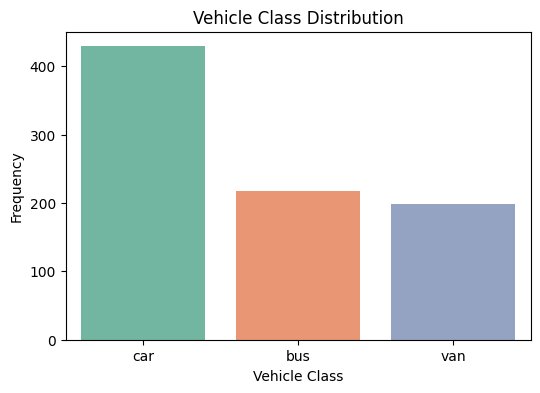

In [89]:
# Displaying the Distribution per class
# Frequencies per class
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

# Barplot
plt.figure(figsize=(6,4))
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]
sns.barplot(x='class', y='count', data=class_counts, palette=colors, hue='class')
plt.title("Vehicle Class Distribution")
plt.xlabel("Vehicle Class")
plt.ylabel("Frequency")
plt.show()

**Note**: The target classes are reasonably balanced. The car class is the most frequent, while bus and van have similar and slightly lower counts.
This level of imbalance is not severe and does not require specific balancing techniques. All classes are sufficiently represented to allow reliable model training and evaluation.

###3.3 **Numerical Feature Distributions**

##### Feature Distribution Histogram

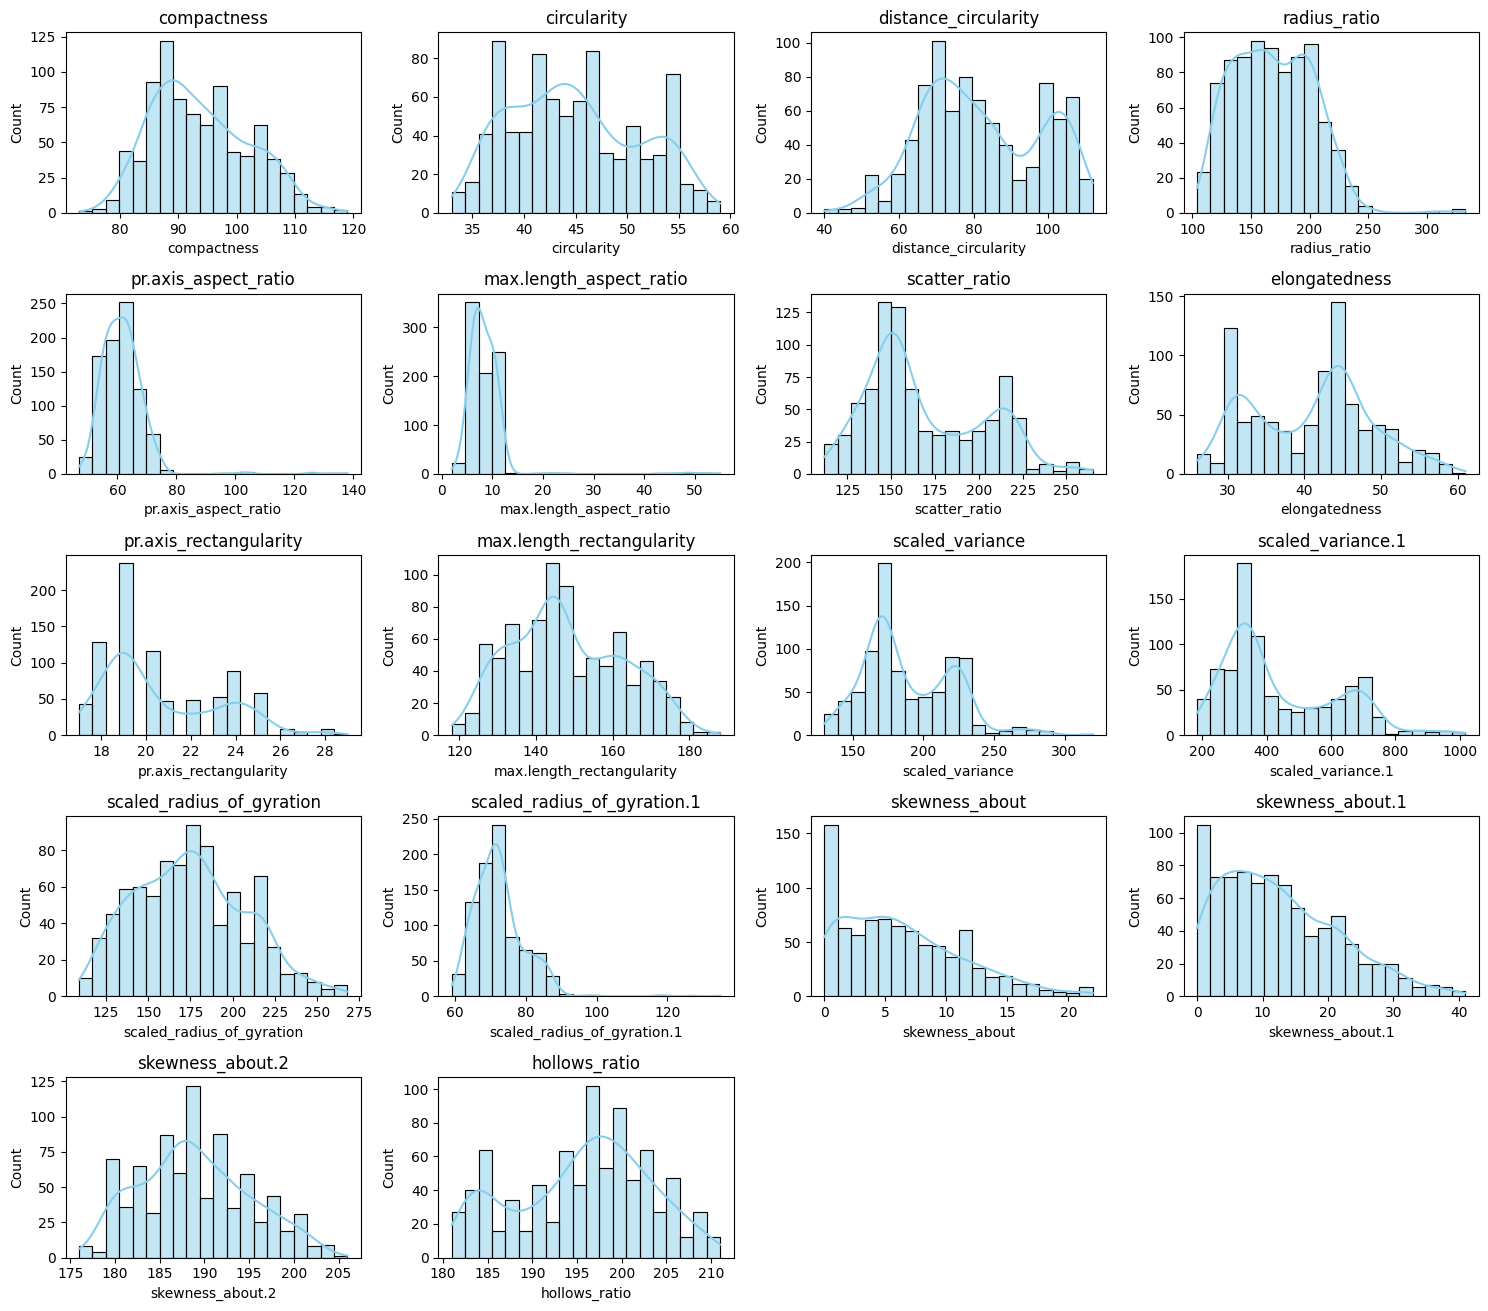

In [90]:
# Feature Distribution Histogram
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
plt.figure(figsize=(15,18))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//3 + 1, 4, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

**Note**: Overall, most features show concentrated distributions with some skewness, indicating that vehicles share common shape characteristics but also present meaningful variability useful for classification.

- **compactness**, **circularity**, **distance_circularity**: Most values are concentrated around a typical range, suggesting similar shape regularity across vehicles, with some variability that helps distinguish between classes.

- **radius_ratio**: This feature is right-skewed, meaning that some vehicles, like buses or vans, have more irregular or elongated shapes compared to cars.

- **pr.axis_aspect_ratio**, **max.length_aspect_ratio**: These features show that vehicles differ in elongation, with some vehicles being longer or more stretched than others, helping to differentiate between vehicle types.

- **scatter_ratio**, **elongatedness**: These features display more variability, indicating different degrees of shape dispersion and elongation, which can help distinguish between vehicles.

- **pr.axis_rectangularity**, **max.length_rectangularity**: These features show moderate variability, reflecting differences in how rectangular the vehicles' shapes are.

- **scaled_variance**, **scaled_variance.1**, **scaled_radius_of_gyration**, **scaled_radius_of_gyration.1**: These features are right-skewed, suggesting that some vehicles have much larger sizes or mass distributions compared to others, which can be important for classification.

- **skewness_about**, **skewness_about.1**: These distributions are positively skewed, indicating that most vehicles are symmetric, with a few showing more noticeable asymmetry.

- **skewness_about.2**, **hollows_ratio**: These features show values concentrated around a typical range, suggesting that most vehicles have similar internal voids or concavities.


##### Feature Dostribution Box Plot by Class

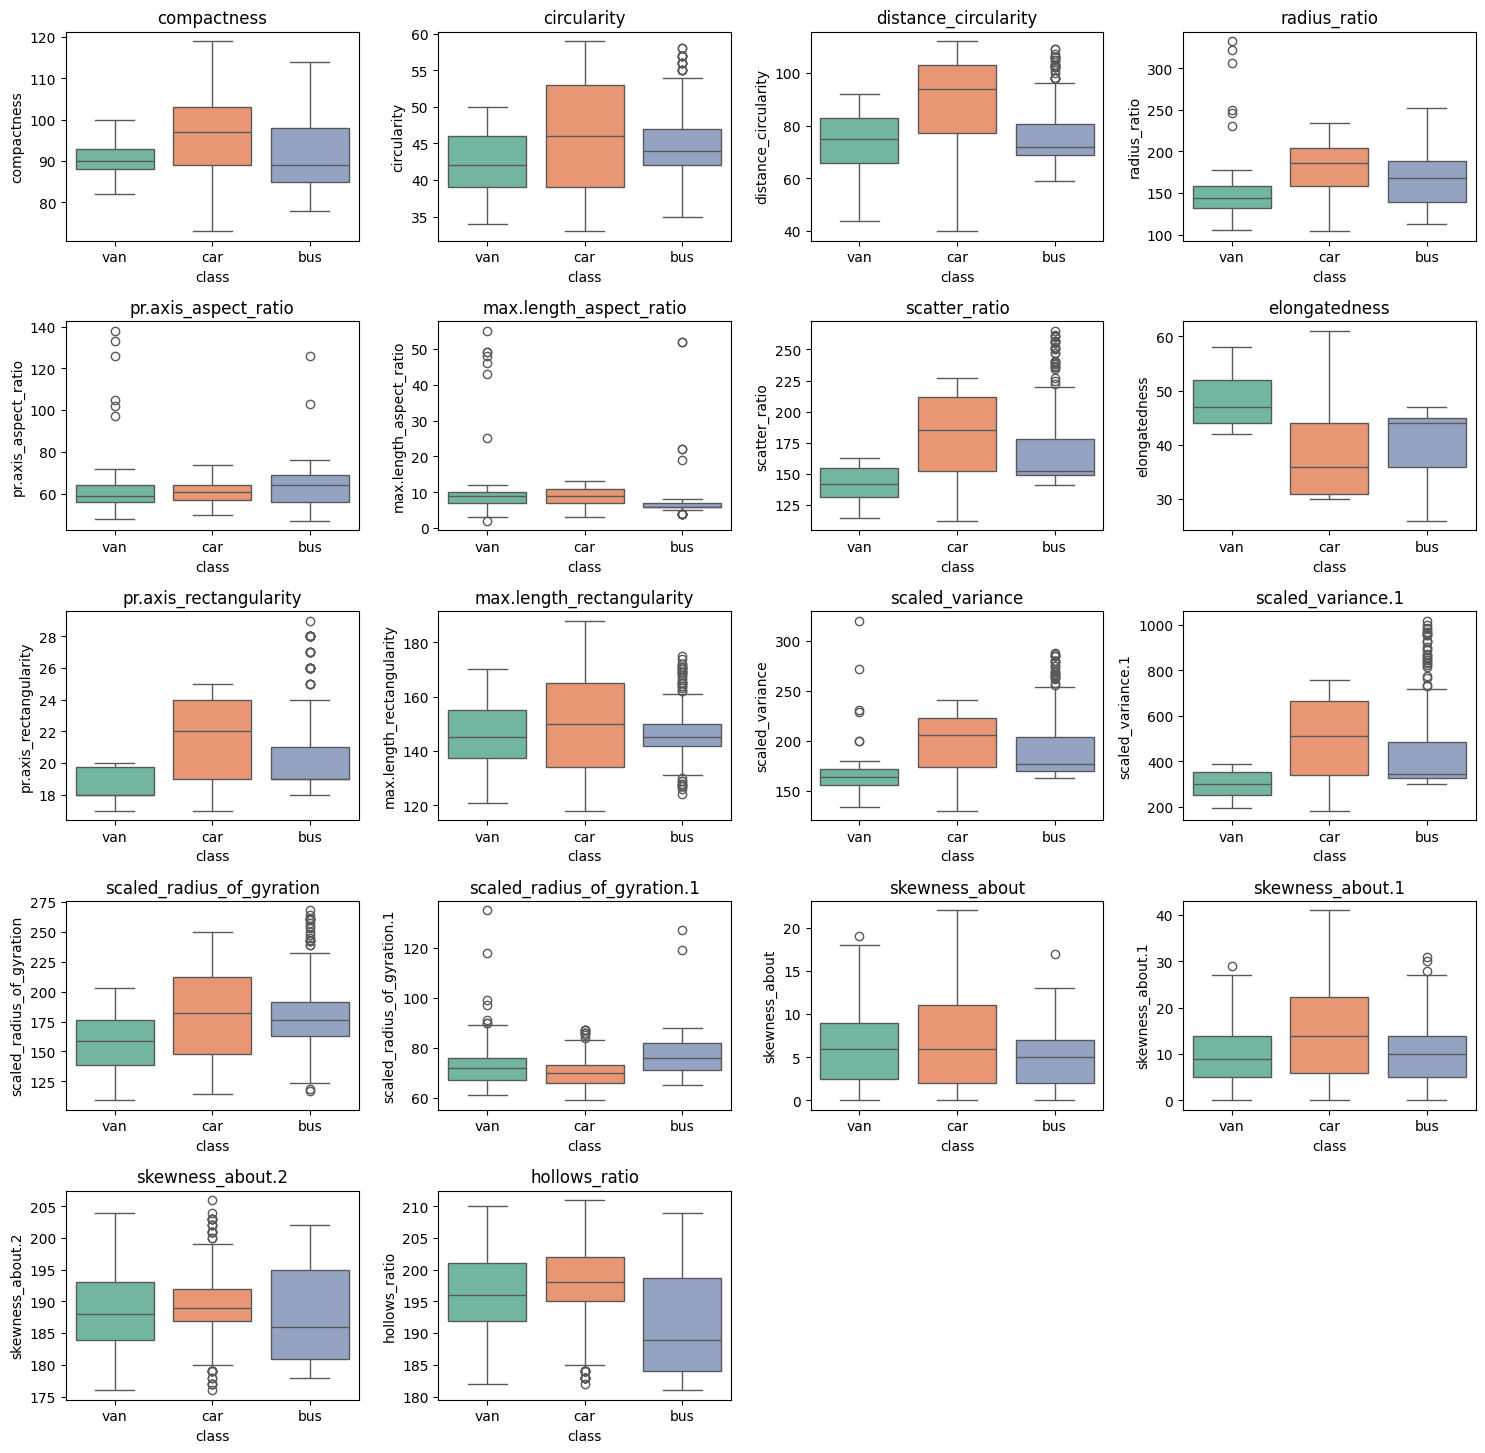

In [91]:
# Feature Distribution Box Plot by Class
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

plt.figure(figsize=(15,20))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//3 + 1, 4, i+1)
    sns.boxplot(data=df, x='class', palette = colors, hue='class', y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

**Note**: The boxplots show clear differences in median values and variability across the car, van, and bus classes. While some overlap is present, many features exhibit class-dependent shifts and different spreads, indicating that shape characteristics vary systematically between vehicle types.

Most variables show overlapping distributions, but a few stand out:  
- **scaled_variance.1** separates classes most clearly, with cars at higher values, vans lower, and buses intermediate
- **scatter_ratio** highlights cars with broader spread and higher medians compared to vans and buses
- **elongatedness** shows vans as more elongated, cars with wider variability, and buses more compact

Overall, these patterns suggest that the combination of multiple features provides useful discriminative information.

Although some outliers are present, they reflect natural variability within each class (car, van, bus); therefore, no outlier capping is applied.

###3.4 **Bivariate and Multivariate Analysis**

####Scatter plot Scatter Ratio vs Scaled Variance 1

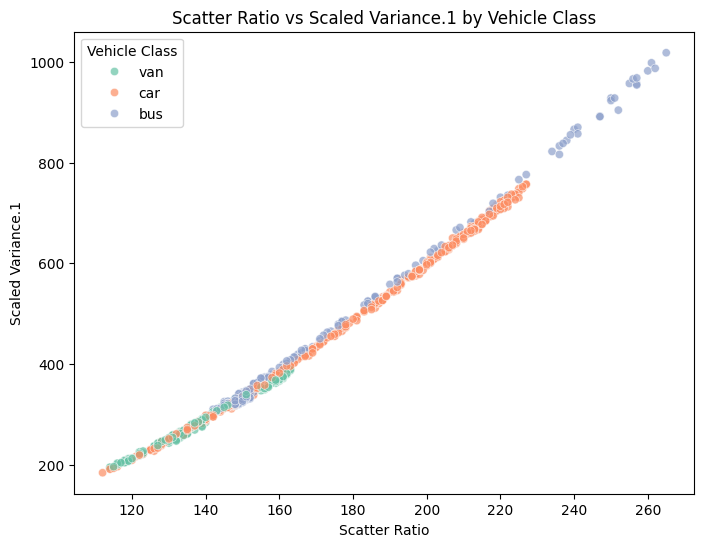

In [92]:
# Scatter plot scatter_ratio vs scaled_variance.1
# Scatter ratio indicates how spread out the shape is based on its axes
# while scaled variance.1 reflects variability in the silhouette's geometry
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='scatter_ratio',
    y='scaled_variance.1',
    hue='class',
    palette=["#66c2a5", "#fc8d62", "#8da0cb"],
    alpha=0.7
)
plt.title("Scatter Ratio vs Scaled Variance.1 by Vehicle Class")
plt.xlabel("Scatter Ratio")
plt.ylabel("Scaled Variance.1")
plt.legend(title="Vehicle Class")
plt.show()

**Note**: In the scatterplot comparing **scatter_ratio** and **scaled_variance.1**, there is a strong linear positive relationship between the two features, a few points clearly stand out from the rest. These represent car vehicles with unusual silhouettes but are not data errors.

The three vehicle classes are well represented across the trend, with buses clustering toward higher values and vans showing tighter spread, while cars exhibit the widest dispersion, including the outliers.

####Scatter Plot Scatter Ratio vs Pr. Axis Rectangularity

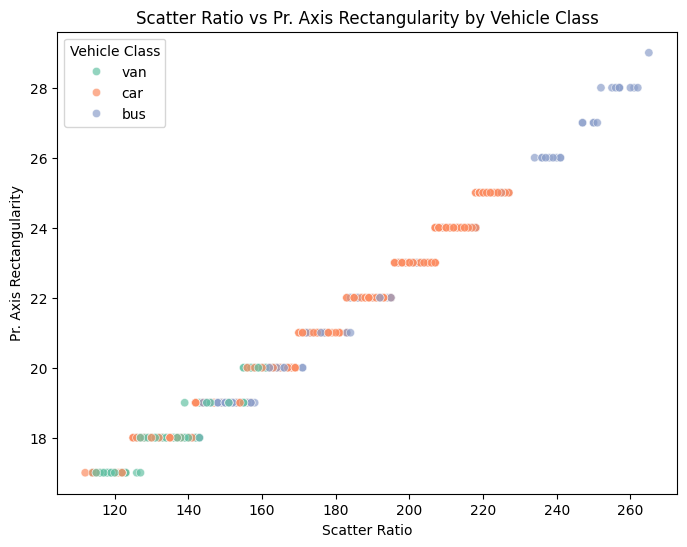

In [93]:
# Scatter plot scatter_ratio vs pr.axis_rectangularity
# Rectangularity measures how closely the shape resembles a rectangle
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='scatter_ratio',
    y='pr.axis_rectangularity',
    hue='class',
    palette=["#66c2a5", "#fc8d62", "#8da0cb"],
    alpha=0.7
)
plt.title("Scatter Ratio vs Pr. Axis Rectangularity by Vehicle Class")
plt.xlabel("Scatter Ratio")
plt.ylabel("Pr. Axis Rectangularity")
plt.legend(title="Vehicle Class")
plt.show()

**Note**: In the scatterplot **Scatter Ratio vs Pr. Axis Rectangularity**, the points align in discrete steps along the y-axis, reflecting the integer nature of the pr.axis_rectangularity feature.

pr.axis_rectangularity behaves almost like a categorical feature.

Three patterns emerge:
- van occupies the lower steps
- car appears oonly in the lower and mainly central steps
- bus appears in the central-lower and mainly in the upper range.

Outliers are clearly visible, highlighting extreme cases in the car class.

####Scatter Plot Scaled Radius of Gyration vs Scaled Radius of Gyration 1

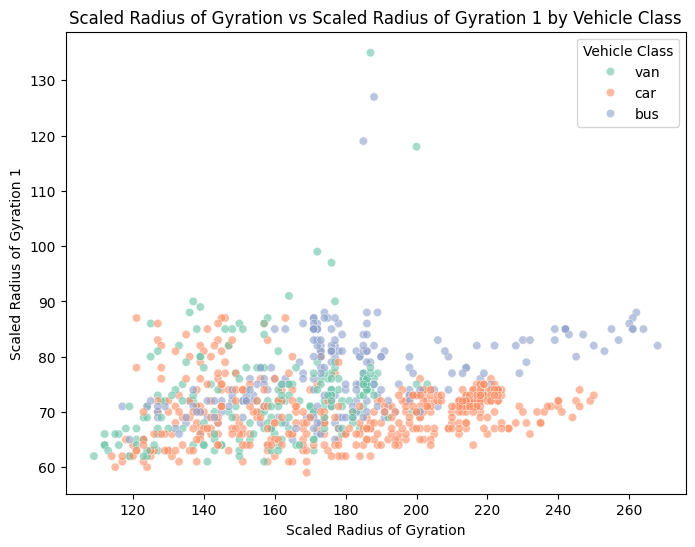

In [94]:
# Scatter Plot Scaled Radius of Gyration vs Scaled Radius of Gyration 1
# Analysing the silhouette
# scaled_radius_of_gyration measures how wide is the vehicle
# scaled_radius_of_gyration.1 measures how high is the vehicle
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='scaled_radius_of_gyration', # dispersion through vehicle x-axis
    y='scaled_radius_of_gyration.1', # dispersion through vehicle y-axis
    hue='class',
    palette=["#66c2a5", "#fc8d62", "#8da0cb"],
    alpha=0.6
)
plt.title("Scaled Radius of Gyration vs Scaled Radius of Gyration 1 by Vehicle Class")
plt.xlabel("Scaled Radius of Gyration")
plt.ylabel("Scaled Radius of Gyration 1")
plt.legend(title="Vehicle Class")
plt.show()

**Note**: In the scatterplot Scalde Radius of Gyration vs Scaled Radius of Gyration 1, the distribution reflects differences in vehicle silhouettes.
- **vans** cluster in the lower-left and show few outliers
- **cars** are spread across the lower quadrants
- **buses** show a slightly linear pattern in the lower region, and a few outliers probably represent vehicles with unusual shapes

###3.5 **Correlation Analysis**

Explore relationships between numerical features to identify:

- Strong correlations (positive or negative)

- Potential multicollinearity

- Features that may be redundant

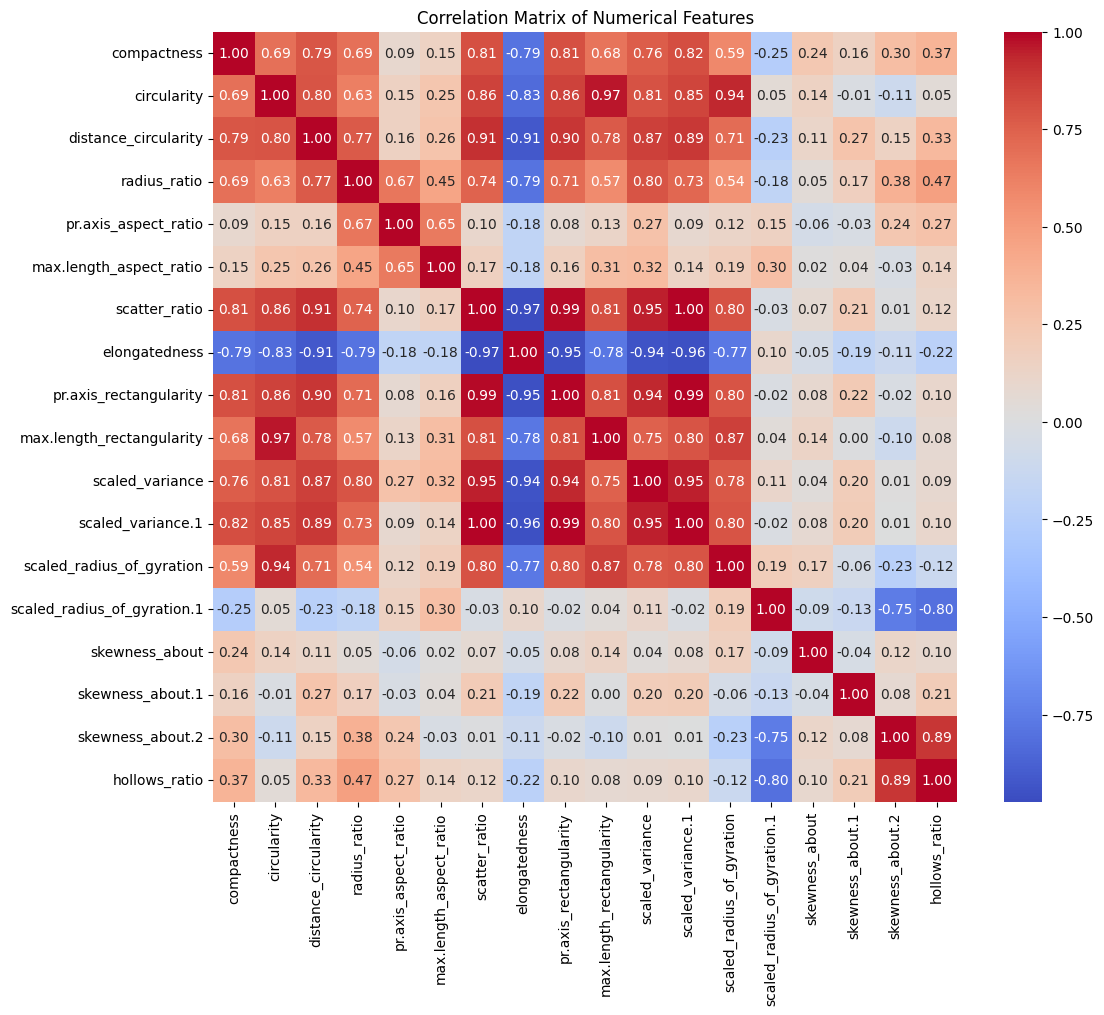

In [95]:
# Correlation Analysis
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Note**: Many geometric features are strongly correlated, meaning they capture similar information about the vehicle shapes:

- High positive correlations: **scatter_ratio**, **pr.axis_rectangularity**, and **scaled_variance.1** (0.99).

- Strong negative correlations: **elongatedness** vs **scatter_ratio**, **pr.axis_rectangularity**, **scaled_variance.1** (-0.97).

- Moderate positive correlations: **compactness**, **circularity**, **distance_circularity** (0.70-0.79).

- Other observations: **scaled_radius_of_gyration.1** and **hollows_ratio** are strongly related (0.80). Skewness features have lower correlations, capturing different aspects.

Some features are redundant, while others provide unique information. This can guide feature selection or dimensionality reduction later.

###3.6 **Feature Redundancy Analysis**



The correlation analysis reveals strong linear relationships among several geometric features.
This section evaluates whether removing highly correlated features improves model performance or generalization.

Candidate features for removal:

Based on correlation values above 0.9 and confirmed by distribution plots:

- **scaled_variance.1**
Highly correlated with scatter_ratio and pr.axis_rectangularity

- **pr.axis_rectangularity**
Strongly correlated with scatter_ratio and scaled_variance.1

- **elongatedness**
Almost perfectly inversely correlated with scatter_ratio

- **max.length_rectangularity**
Strongly correlated with circularity

In [96]:
# Experimental feature reduction (EDA only)
features_to_drop = [
    'scaled_variance.1',
    'pr.axis_rectangularity',
    'elongatedness',
    'max.length_rectangularity'
]

df_reduced = df.drop(columns=features_to_drop)

- Model performance was evaluated using the reduced feature set.

- Most models showed equal or slightly worse performance.

- Cross-validation results did not improve for any model.

- Tree-based models and SVM benefited more from the full feature space.

- Minor improvements observed in isolated cases (kNN regularized) were not consistent in cross-validation.

**Decision**

Feature reduction is not adopted in the final modeling pipeline.
Despite high correlations, the complete set of geometric features provides complementary information that improves classification stability.

##4. **Data Preparation**

Based on the feature redundancy analysis, no variables were removed.
The full feature set is retained for data preparation and modeling.

###4.1 **Encoding Target**

In [97]:
# Map vehicle classes to numeric values for model training
# car: 0, bus: 1, van: 2
class_mapping = {'car': 0, 'bus': 1, 'van': 2}

###4.2 **Feature/Target Separation**

In [98]:
# Separating features (X) from target (y)
X = df.drop('class', axis=1)  # All 18 numerical features
y = df['class'].map(class_mapping)  # Target: vehicle class encoded

###4.3 **Train/Test Split**

In [99]:
# Slpitting into Train and Test. Keeping 20% of data for testing, maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (676, 18)
Test size: (170, 18)


**Note**: The train/test split is fixed at 80/20. To ensure a fair comparison across models, a single train/test split is defined and kept fixed throughout the analysis.

Although different algorithms may react differently to the specific split, modifying the split per model would compromise comparability.

Model performance differences are therefore addressed by setting appropriate parameters and using cross-validation rather than re-splitting the data.

###4.4 **Imputation**

In [100]:
# Initialize the imputer (median imputation)
imputer = SimpleImputer(strategy='median')

# Fit only on training data
X_train_imputed = imputer.fit_transform(X_train)

# Apply the same transformation to test data
X_test_imputed = imputer.transform(X_test)

**Note**: Impute missing values using the median computed from the training set only to avoid data leakage.

###4.4 **Feature Scaling**

Feature scaling was applied after the train-test split to benefit linear and distance-based models, while remaining neutral for tree-based ones.

In [101]:
# Initializing the scaler
scaler = StandardScaler()

# Fit and transform features
X_train_scaled = scaler.fit_transform(X_train_imputed)
# transform on test
X_test_scaled = scaler.transform(X_test_imputed)

# I convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


In [102]:
# Taking a look at the scalded train data
X_train_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
636,0.283643,-0.627000,-0.840102,-0.487306,-0.811961,-0.363216,-0.844715,0.780592,-1.005957,-0.491654,-0.848999,-0.810104,-0.179715,-1.607676,0.973077,-0.556428,2.088294,1.771352
520,-0.565850,-0.790271,0.428260,0.154360,-0.523908,-0.124137,0.235242,-0.496156,0.148588,-1.045353,0.431722,0.171869,-0.606414,-0.318144,0.156695,0.563385,0.005451,0.031674
514,-0.565850,-1.116813,-0.523012,-0.945639,-0.379881,-0.363216,-0.994709,1.035941,-1.005957,-1.045353,-0.688909,-0.917331,-1.429333,-0.031581,0.156695,-0.668409,0.005451,-0.369791
812,0.526355,-1.116813,-0.649848,0.704359,1.060386,-0.841373,-0.094745,-0.368482,-0.236260,-1.183778,0.015488,-0.076446,-1.124548,-0.318144,-1.067879,-1.116334,1.767857,0.834602
830,0.404999,-1.280084,-0.776684,0.123804,0.628306,-0.363216,-0.544727,0.269892,-0.621109,-1.322203,-0.688909,-0.533572,-1.703639,-1.034551,-1.271975,0.339422,1.928075,1.637531


##5. **Modeling**


###5.1 **Decision Tree**

In [103]:
# Initializing the basic model
dt_model = DecisionTreeClassifier(random_state=3)

# Training the model
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=3)

###5.2 **Random Forest**

In [104]:
# Initializing the basic model
rf_model = RandomForestClassifier(random_state=3)

# Training the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=3)

###5.3 **Logistic Regression**

In [105]:
# Initializing the basic model
lr_model = LogisticRegression(random_state=3) # max_iter=1000 just ensures the model has enough iterations to converge.

# Training the model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=3)

###5.4 **kNN**

In [106]:
# Initializing the basic model
knn_model = KNeighborsClassifier()

# Trainig the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

###5.5 **SVM**

In [107]:
# Initializing the basic model
svm = SVC(probability=True, random_state=3)
# Training the model
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=3)

###5.6 **Gradient Boosting**

In [108]:
# Initializing the basic model
gb_model = GradientBoostingClassifier(random_state = 3)

# Training the model
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=3)

###5.7 **XGBoost**

In [109]:
#Initializing the basic model
xg_model = XGBClassifier(random_state = 3)

# Training the model
xg_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

##6. **Model Evaluation**

While accuracy provides a general overview of model performance, the most relevant metric for this business case is the **F1-score**.

This choice ensures balanced evaluation across all three vehicle classes, avoiding bias toward the majority class and reflecting the model's ability to minimize both false positives and false negatives.

###6.1 **Model Evaluation Functions**

A set of functions to evaluate models, store metrics, plot confusion matrices.

In [110]:
# Initialize an empty DataFrame to collect cross-validation results.
# Each row will correspond to a model and store its evaluation metrics.
cv_summary_df = pd.DataFrame(columns=[
    'Model',
    'CV_Accuracy',
    'CV_Precision',
    'CV_Recall',
    'CV_F1',
    'CV_ROC_AUC'
])

In [111]:
# Function to update the cross validation summary dataframe
# ---------------------------------------------------------
def update_cv_summary(model_name, cv_metrics):
  global cv_summary_df
  row = {'Model': model_name,
        'CV_Accuracy': cv_metrics['cv_accuracy_mean'],
        'CV_Precision': cv_metrics['cv_precision_mean'],
        'CV_Recall': cv_metrics['cv_recall_mean'],
        'CV_F1': cv_metrics['cv_f1_mean'],
        'CV_ROC_AUC': cv_metrics['cv_roc_auc_mean']
    }

  # Adding the new row to the dataframe
  if cv_summary_df is None or cv_summary_df.empty:
    cv_summary_df = pd.DataFrame([row])
  else:
    cv_summary_df = pd.concat([cv_summary_df, pd.DataFrame([row])], ignore_index=True)


In [112]:
# Function to perform cross-validation returning mean and std of main metrics per model
# ---------------------------------------------------------
def cross_validation_evaluation(model, X, y, cv=5):
  score = {'accuracy': 'accuracy','precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro', 'roc_auc': 'roc_auc_ovr'}

  cv_results = cross_validate(model, X, y, cv=cv, scoring=score, return_train_score=False)

  # Collect average cross-validation metrics for the current model.
  # Each key stores the mean (and std for accuracy) of the metric
  # computed across all CV folds. These values will later be appended
  # to the summary DataFrame (cv_summary_df) to compare models.
  # ------------------------------------------------------
  cv_metrics = {
        'cv_accuracy_mean': cv_results['test_accuracy'].mean(),
        'cv_accuracy_std': cv_results['test_accuracy'].std(),
        'cv_precision_mean': cv_results['test_precision'].mean(),
        'cv_recall_mean': cv_results['test_recall'].mean(),
        'cv_f1_mean': cv_results['test_f1'].mean(),
        'cv_roc_auc_mean': cv_results['test_roc_auc'].mean()
  }
  # ------------------------------------------------------

  # Creating a summary DataFrame to display the average cross-validation metrics.
  # ------------------------------------------------------
  metrics_df = pd.DataFrame({
    'Accuracy': [cv_metrics['cv_accuracy_mean']],
    'Precision': [cv_metrics['cv_precision_mean']],
    'Recall': [cv_metrics['cv_recall_mean']],
    'F1-Score': [cv_metrics['cv_f1_mean']],
    'ROC AUC': [cv_metrics['cv_roc_auc_mean']],}, index=['Cross Validation'])
  # ------------------------------------------------------

  print(metrics_df)
  return cv_metrics

In [113]:
# Function to plot the confusion matrices for train and test
# ----------------------------------------------------------
def plot_confusion_matrix(y, pred, descr="Train"):
  # Defining the 3 classes
  classes = [0, 1, 2]  # car, bus, van

  # Confusion Matrix 3x3
  # ---------------------------------------
  confusion_matrix_t = confusion_matrix(y, pred)
  plt.figure(figsize=(2,1.5)) # Adjusting the dimensions
  sns.heatmap(confusion_matrix_t, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  tit = "Confusion Matrix " + str(descr)
  plt.title(tit)
  plt.show()


  # Confusion Matrices 2x2
  # ---------------------------------------------------
  # This dictionary I will use to summarize the results at the end of evaluation phase
  confusion_matrices_dict = {}

  # Matrix 0 vs 1 (car vs bus)
  subset_01 = (y == 0) | (y == 1)
  confusion_matrix_01 = confusion_matrix(y[subset_01], pred[subset_01], labels=[0, 1])
  confusion_matrices_dict["CM_0vs1"] = confusion_matrix_01 # for the summary dataframe

  # Matrix 0 vs 2 (car vs van)
  subset_02 = (y == 0) | (y == 2)
  confusion_matrix_02 = confusion_matrix(y[subset_02], pred[subset_02], labels=[0, 2])
  confusion_matrices_dict["CM_0vs2"] = confusion_matrix_02 # for the summary dataframe

  # Matrix 1 vs 2 (bus vs van)
  subset_12 = (y == 1) | (y == 2)
  confusion_matrix_12 = confusion_matrix(y[subset_12], pred[subset_12], labels=[1, 2])
  confusion_matrices_dict["CM_1vs2"] = confusion_matrix_12 # for the summary dataframe

  confusion_matrices = [confusion_matrix_01, confusion_matrix_02, confusion_matrix_12]
  titles = ["Car vs Bus", "Car vs Van", "Bus vs Van"]

  # to visualize labels instead numbers in each confusion matrix
  labels_descr = ['car', 'bus', 'van']
  pairs = [[0,1], [0,2], [1,2]]

  fig, axes = plt.subplots(1, 3, figsize=(6,1.8))
  # plotting the 3 confusion matrices with title and labels
  for i in range(len(confusion_matrices)):
    ax = axes[i]
    cm = confusion_matrices[i]
    title = titles[i]

    tick_labels = [labels_descr[j] for j in pairs[i]]

    sns.heatmap(cm, annot=True, fmt="d",cmap="Blues",  ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    ax.set_title(title)

  plt.tight_layout()
  plt.show()

  return confusion_matrices_dict


In [114]:
# In the summary table, instead to visualize the array representing a confusion matrix
# this function transforms the list into a html table 2x2 with a border
def format_cm(cm):
    return (
        f"<table style='border-collapse:collapse'>"
        f"<tr><td style='border:1px solid black; padding:1px''>{cm[0,0]}</td><td style='border:1px solid black; padding:1px''>{cm[0,1]}</td></tr>"
        f"<tr><td style='border:1px solid black; padding:1px''>{cm[1,0]}</td><td style='border:1px solid black; padding:1px''>{cm[1,1]}</td></tr>"
        f"</table>"
    )

In [115]:
# Initializing the summary dataframe
# Each row will correspond to a model and store its evaluation metrics.
summary_df = pd.DataFrame(columns=[
    'Model', 'Var', 'Tr_Acc', 'Te_Acc', 'Tr_Pre', 'Te_Pre', 'Tr_Rec', 'Te_Rec', 'Tr_F1', 'Te_F1', 'Tr_ROC', 'Te_ROC',
    'Tr_CM_CB', 'Te_CM_CB', 'Tr_CM_CV', 'Te_CM_CV','Tr_CM_BV', 'Te_CM_BV'])


In [116]:
# Function to update the summary dataframe with metrics and confusion matrices 2x2 values
# ---------------------------------------------------------------
def update_summary(model_name, variant, metrics_dict, cms_dict):
  global summary_df

  row = {
      'Model': model_name,
      'Var': variant,
      'Tr_Acc': metrics_dict['train_accuracy'],
      'Te_Acc': metrics_dict['test_accuracy'],
      'Tr_Pre': metrics_dict['train_precision'],
      'Te_Pre': metrics_dict['test_precision'],
      'Tr_Rec': metrics_dict['train_recall'],
      'Te_Rec': metrics_dict['test_recall'],
      'Tr_F1': metrics_dict['train_f1'],
      'Te_F1': metrics_dict['test_f1'],
      'Tr_ROC': metrics_dict['train_roc_auc'],
      'Te_ROC': metrics_dict['test_roc_auc'],
      'Tr_CM_CB': format_cm(cms_dict['train_confusion_matrices']['CM_0vs1']),
      'Tr_CM_CV': format_cm(cms_dict['train_confusion_matrices']['CM_0vs2']),
      'Tr_CM_BV': format_cm(cms_dict['train_confusion_matrices']['CM_1vs2']),
      'Te_CM_CB': format_cm(cms_dict['test_confusion_matrices']['CM_0vs1']),
      'Te_CM_CV': format_cm(cms_dict['test_confusion_matrices']['CM_0vs2']),
      'Te_CM_BV': format_cm(cms_dict['test_confusion_matrices']['CM_1vs2'])}

  # Initialize summary_df on the first iteration using row keys as columns
  if summary_df is None:
    print('prima volta cv_summary = None', cv_summary_df)
    summary_df = pd.DataFrame(columns=row.keys())

  summary_df.loc[len(summary_df)] = row

In [117]:
# Evaluating a generic classification model with multiple metrics.
# Includes accuracy, confusion matrices, precision, recall, F1-score, and ROC AUC.
# I will save the metrics in a dataframe to display a comparing table at the end of the evaluation phase

def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name, variant):
  # Train and Test Predictions
  # --------------------------------------
  train_pred = model.predict(X_train_scaled)
  test_pred = model.predict(X_test_scaled)

  # plotting Confusion matrices
  train_cms = plot_confusion_matrix(y_train, train_pred, 'Train')
  test_cms = plot_confusion_matrix(y_test, test_pred, 'Test')

  # Accuracy
  # ---------------------------------------
  train_accuracy = accuracy_score(y_train, train_pred)
  test_accuracy = accuracy_score(y_test, test_pred)

  # Precision, Recall, F1-Score
  # -------------------------------
  train_precision = precision_score(y_train, train_pred, average='macro')
  train_recall = recall_score(y_train, train_pred, average='macro')
  train_f1 = f1_score(y_train, train_pred, average='macro')

  test_precision = precision_score(y_test, test_pred, average='macro')
  test_recall = recall_score(y_test, test_pred, average='macro')
  test_f1 = f1_score(y_test, test_pred, average='macro')

  # ROC AUC Score
  # -------------------------------
  # model must have predict_proba method otherwise we obtain an error
  train_proba = model.predict_proba(X_train_scaled)
  test_proba = model.predict_proba(X_test_scaled)

  train_roc_auc = roc_auc_score(y_train, train_proba, multi_class="ovr")
  test_roc_auc = roc_auc_score(y_test, test_proba, multi_class="ovr")

  # Dataframe to visualize these metrics in a table
  # ------------------------------------------------------
  metrics_df = pd.DataFrame({
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-Score': [train_f1, test_f1],
    'ROC AUC': [train_roc_auc, test_roc_auc]}, index=['Train', 'Test'])
  # ------------------------------------------------------
  print() # A space between the confusion matrices and the metric table
  print('Classification Report Train')
  print(classification_report(y_train, train_pred))
  print('Classification Report Test')
  print(classification_report(y_test, test_pred))
  print("-" * 60)
  # print the metric table
  print(metrics_df)

  # Metrics calculation for the summary dataframe
  metrics = {}
  metrics['train_accuracy'] = round(train_accuracy,4)
  metrics['test_accuracy'] = round(test_accuracy,4)
  metrics['train_precision'] = round(train_precision,4)
  metrics['test_precision'] = round(test_precision,4)
  metrics['train_recall'] = round(train_recall,4)
  metrics['test_recall'] = round(test_recall,4)
  metrics['train_f1'] = round(train_f1,4)
  metrics['test_f1'] = round(test_f1,4)
  metrics['train_roc_auc'] = round(train_roc_auc,4)
  metrics['test_roc_auc'] = round(test_roc_auc,4)

  # Confusion matrices metrics for the summary dataframe
  cms_metrics = {}
  cms_metrics['train_confusion_matrices'] = train_cms
  cms_metrics['test_confusion_matrices'] = test_cms

  # Updating the dataframe with all the metrics and information about
  # the model and variance
  update_summary(model_name, variant, metrics, cms_metrics)


###6.2 **Decision Tree Evaluation**

####6.2.1 **Basic**

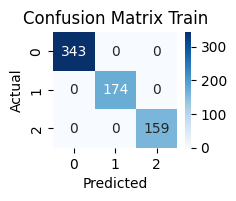

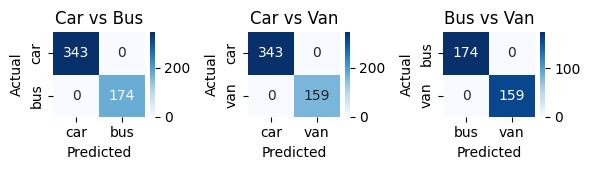

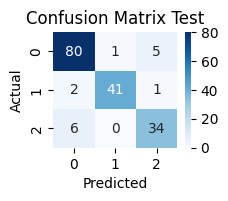

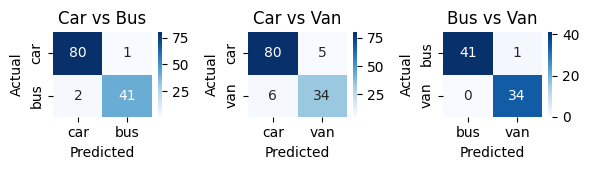


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        86
           1       0.98      0.93      0.95        44
           2       0.85      0.85      0.85        40

    accuracy                           0.91       170
   macro avg       0.91      0.90      0.91       170
weighted avg       0.91      0.91      0.91       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score  ROC AUC
Train  1.000000    1.00000  1.000000  1.000000  1.00000
Test   0.

In [118]:
# Evaluation Decision Tree Model
evaluate_model(dt_model,X_train_scaled, y_train, X_test_scaled, y_test, 'Decision Tree', 'Basic')

**Note**: The model perfectly fits the training set (Accuracy = 1.0, all metrics = 1.0), indicating complete memorization of the data.

On the test set, the model achieves Accuracy = 0.912, with high precision, recall, and F1-score (~0.91), and ROC AUC = 0.927.

Confusion matrices reveal that most misclassifications involve cars predicted as vans (5 instances) and a few others, showing that the model overfits the training data but still generalizes "reasonably" well.

As the first baseline model, the F1-score serves as the key reference point for subsequent comparisons, though its generalization capacity remains limited.

####6.2.2 **Regularized**

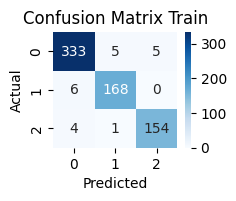

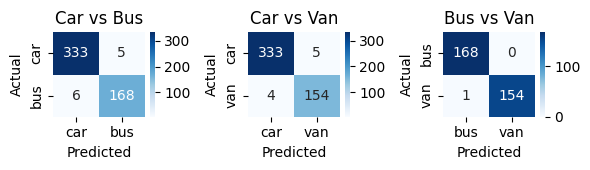

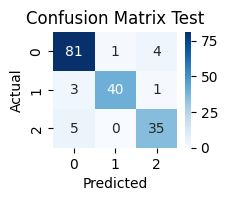

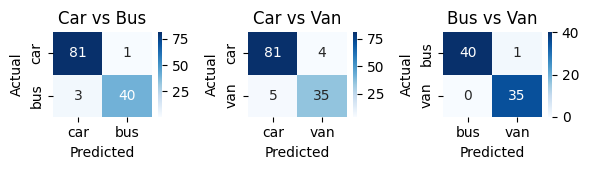


Classification Report Train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       343
           1       0.97      0.97      0.97       174
           2       0.97      0.97      0.97       159

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        86
           1       0.98      0.91      0.94        44
           2       0.88      0.88      0.88        40

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.968935   0.968305  0.968305  0.968305  0.998213
Test   

In [119]:
# Regularized Decision Tree
dt_reg = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, random_state=3)

dt_reg.fit(X_train_scaled, y_train)
evaluate_model(dt_reg, X_train_scaled, y_train, X_test_scaled, y_test, "Decision Tree", "Reg")

**Note**:
- Training accuracy (0.969) remains slightly higher than test accuracy (0.918), but the gap is now much narrower than in the unregularized model. Precision, recall, and F1-score follow the same trend, showing consistent performance across both sets.

- ROC AUC stays very high in both train (0.998) and test (0.973), confirming that the model preserves strong discriminative ability even after regularization.

- Regularization effectively reduces overfitting: training metrics decrease slightly compared to the basic Decision Tree, while test performance improves in stability, making the model more reliable on unseen data.

- The F1-score on the test set (0.914) reflects this balance. Cars and buses are classified with high confidence, while vans remain the most challenging class, though performance is still solid and more stable than in the unregularized version.

###6.3 **Random Forest Evaluation**

####6.3.1 **Basic**

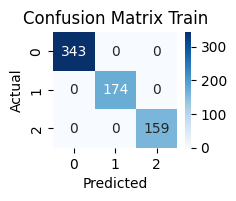

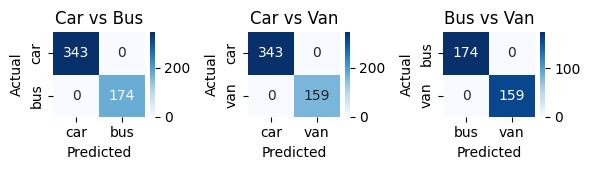

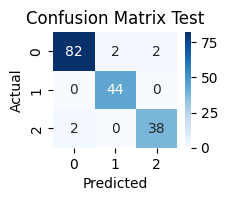

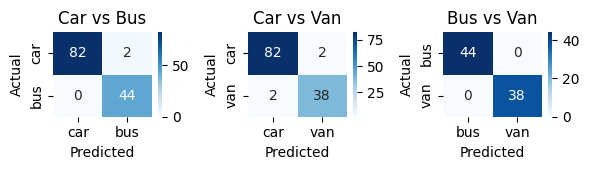


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.96      1.00      0.98        44
           2       0.95      0.95      0.95        40

    accuracy                           0.96       170
   macro avg       0.96      0.97      0.96       170
weighted avg       0.96      0.96      0.96       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  1.000000   1.000000  1.000000  1.000000  1.000000
Test   

In [120]:
# Evaluation Random Forest
evaluate_model(rf_model,X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest', 'Basic')

**Note**: The Random Forest shows excellent performance with only minor overfitting, as training accuracy reaches 1.0 while test accuracy remains very high (0.965).

Precision, recall, and F1-score are all around 0.96 on the test set, and ROC AUC is almost perfect (0.998), confirming the model's strong discriminative ability.

The classifier effectively distinguishes all three vehicle classes, including those that were more challenging for the single Decision Tree. The F1-score demonstrates a clear improvement in generalization compared to the baseline, making Random Forest a robust and reliable candidate for Prospect Auto.

####6.3.2 **Regularized**

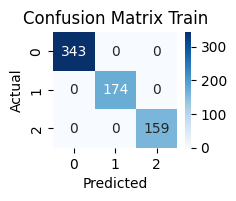

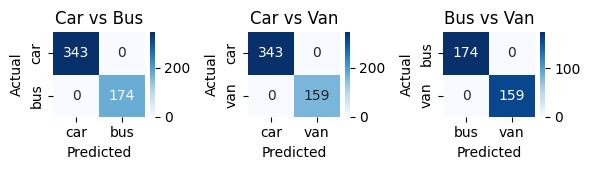

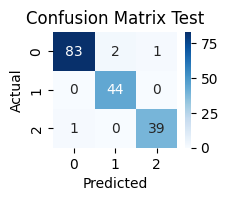

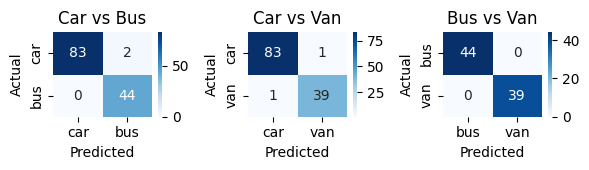


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.96      1.00      0.98        44
           2       0.97      0.97      0.97        40

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  1.000000   1.000000  1.000000  1.000000  1.000000
Test   

In [121]:
# Random Forest Regularized
rf_reg = RandomForestClassifier(n_estimators =200,  random_state=3)

rf_reg.fit(X_train_scaled, y_train)
evaluate_model(rf_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest', 'Reg')

**Note**: Increasing the number of estimators to 200 further stabilizes the Random Forest and improves its generalization. Training accuracy remains at 1.0, as expected for an ensemble of deep trees, while test accuracy rises to 0.976, with similarly strong precision, recall, and F1-scores across all classes.

ROC AUC is nearly perfect on the test set (0.999), confirming the model's exceptional discriminative ability. The classifier handles all three vehicle types consistently well: cars and buses achieve F1-scores close to 0.98, and vans reach 0.97, showing that the model maintains high performance even on the most challenging class.

The increase to 200 estimators enhances robustness without introducing additional overfitting, placing the model in a stable performance region. The resulting F1-score (0.976) makes this regularized Random Forest one of the most reliable and accurate models in the entire evaluation.


###6.4 **Logistic Regression Evaluation**

####6.4.1 **Basic**

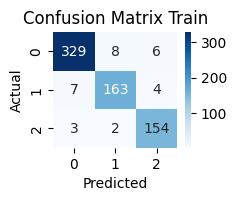

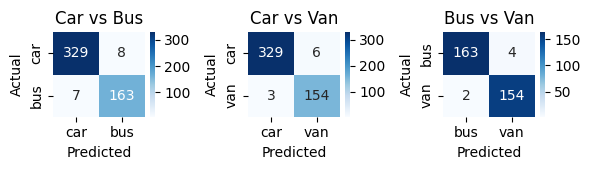

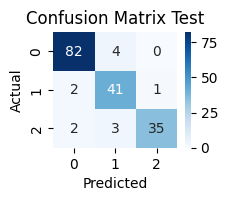

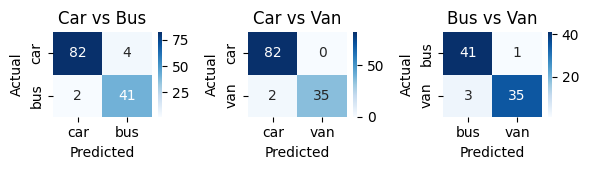


Classification Report Train
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       343
           1       0.94      0.94      0.94       174
           2       0.94      0.97      0.95       159

    accuracy                           0.96       676
   macro avg       0.95      0.95      0.95       676
weighted avg       0.96      0.96      0.96       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.85      0.93      0.89        44
           2       0.97      0.88      0.92        40

    accuracy                           0.93       170
   macro avg       0.93      0.92      0.92       170
weighted avg       0.93      0.93      0.93       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.955621   0.950574  0.954840  0.952617  0.997425
Test   

In [122]:
# Logistic Regression Model Evaluation
evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression', 'Basic')

**Note**: Logistic Regression performs slightly worse than the tree-based models evaluated so far. Training accuracy (0.956) is moderately higher than test accuracy (0.929), with similar gaps across precision, recall, and F1-score (train ≈ 0.95 vs. test ≈ 0.92). This indicates a small amount of overfitting, though generalization remains reasonably strong.

ROC AUC is high for both train (0.997) and test (0.984), confirming that the model maintains good discriminative ability despite its linear nature.

Performance varies across classes: cars and vans achieve strong F1-scores, while buses show a larger drop in precision, reflecting the model's difficulty in separating this class under linear boundaries. Even so, the overall F1-score (0.922 on test) highlights a balanced and reliable performance.

####6.4.2 **Regularized**

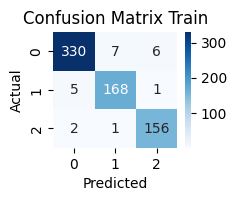

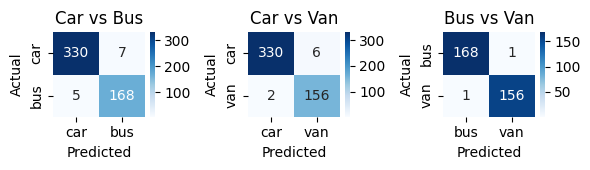

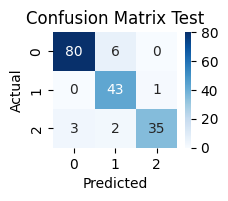

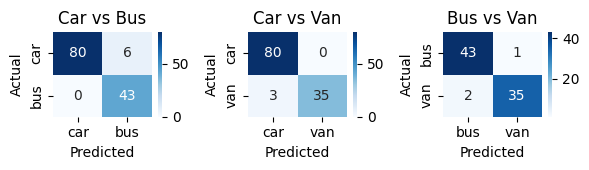


Classification Report Train
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       343
           1       0.95      0.97      0.96       174
           2       0.96      0.98      0.97       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        86
           1       0.84      0.98      0.91        44
           2       0.97      0.88      0.92        40

    accuracy                           0.93       170
   macro avg       0.93      0.93      0.92       170
weighted avg       0.93      0.93      0.93       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.967456   0.963610  0.969583  0.966511  0.996285
Test   

In [123]:
# Logistic Regression Regularized
lr_model_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=3)
# Fitting the model
lr_model_reg.fit(X_train_scaled, y_train)

evaluate_model(lr_model_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression', 'Reg')

**Note**: Logistic Regression continues to show solid generalization, with balanced precision and recall across classes. Training accuracy (0.967) remains slightly higher than test accuracy (0.929), indicating a mild degree of overfitting, though still less pronounced than in the tree-based models.

L1 regularization helps stabilize the model by reducing noise and emphasizing the most informative silhouette features. This contributes to the consistent performance observed across the three classes, with cars and vans achieving strong F1-scores and buses showing improved recall.

The overall F1-score on the test set (0.924) confirms the model's balanced behavior, making this regularized Logistic Regression a dependable linear alternative within the evaluation.

###6.5 **kNN Evaluation**

####6.5.1 **Basic**

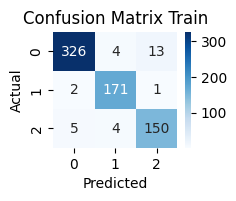

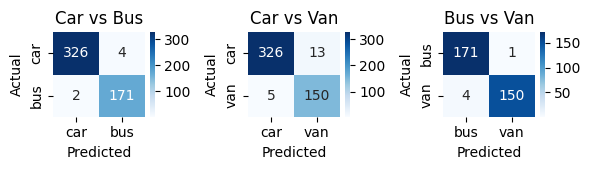

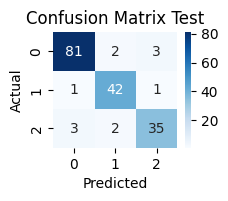

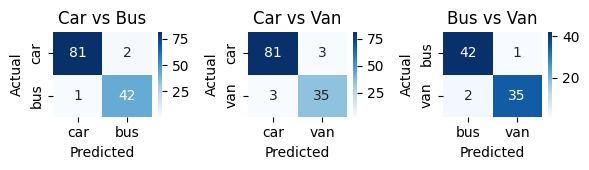


Classification Report Train
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       343
           1       0.96      0.98      0.97       174
           2       0.91      0.94      0.93       159

    accuracy                           0.96       676
   macro avg       0.95      0.96      0.95       676
weighted avg       0.96      0.96      0.96       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.91      0.95      0.93        44
           2       0.90      0.88      0.89        40

    accuracy                           0.93       170
   macro avg       0.92      0.92      0.92       170
weighted avg       0.93      0.93      0.93       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.957101    0.94964  0.958864  0.954043  0.995562
Test   

In [124]:
# kNN Model Evaluation
evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'kNN', 'Basic')

**Note**: The k-Nearest Neighbors model achieves strong performance, with F1-scores of 0.95 on training data and 0.92 on test data.

ROC AUC values remain high (0.996 train, 0.984 test), confirming good discriminative ability. The model classifies the three vehicle types reasonably well, though some confusion persists between cars and vans, and buses show slightly lower recall.

Overall, kNN provides solid results, but its stability is lower compared to more robust algorithms such as Random Forest when generalization is considered.

####6.5.2 **Regularized**

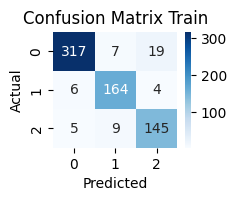

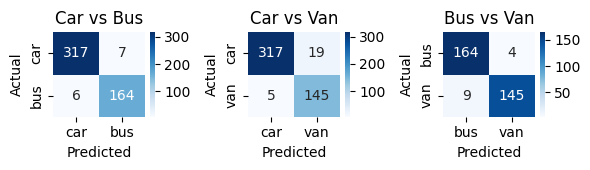

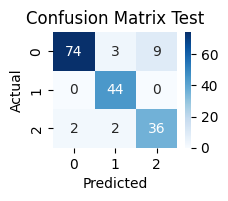

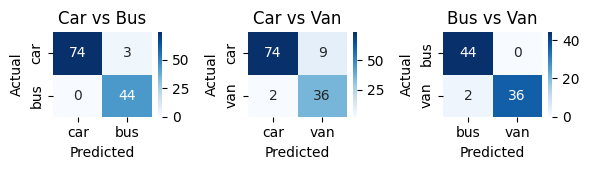


Classification Report Train
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       343
           1       0.91      0.94      0.93       174
           2       0.86      0.91      0.89       159

    accuracy                           0.93       676
   macro avg       0.91      0.93      0.92       676
weighted avg       0.93      0.93      0.93       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        86
           1       0.90      1.00      0.95        44
           2       0.80      0.90      0.85        40

    accuracy                           0.91       170
   macro avg       0.89      0.92      0.90       170
weighted avg       0.91      0.91      0.91       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.926036   0.913557  0.926226  0.919421  0.988161
Test   

In [125]:
# Initializing the model regularized with k = 15
knn_model_reg = KNeighborsClassifier(n_neighbors = 15)

# Fitting the model
knn_model_reg.fit(X_train_scaled, y_train)

# kNN regularized Model Evaluation
evaluate_model(knn_model_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'kNN', 'Reg')

**Note**: Increasing the number of neighbors to 15 and applying distance-based weighting reduces overfitting compared to the baseline (k=5).

Training and test scores remain close, confirming improved stability.

Overall performance is still slightly lower than tree-based models and logistic regression, with ROC AUC remaining strong but not at the same level as Random Forest.

This confirms that kNN is more sensitive to dataset size and feature noise, making it less robust when compared to more advanced models.

###6.6 **SVM Evaluation**

####6.6.1 **Basic**

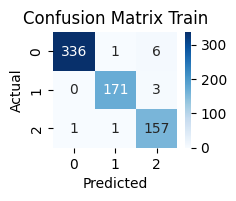

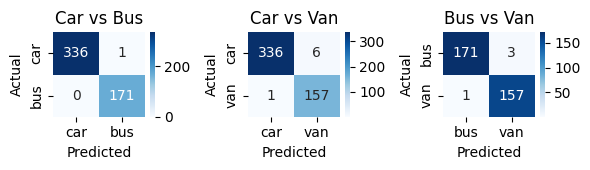

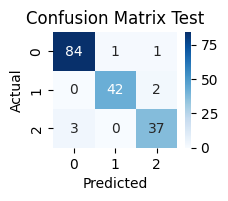

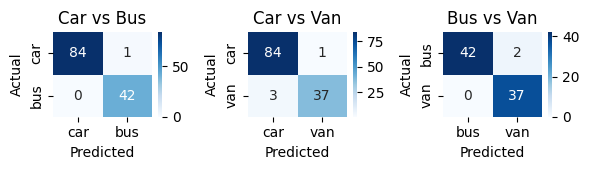


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       343
           1       0.99      0.98      0.99       174
           2       0.95      0.99      0.97       159

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      0.95      0.97        44
           2       0.93      0.93      0.93        40

    accuracy                           0.96       170
   macro avg       0.96      0.95      0.95       170
weighted avg       0.96      0.96      0.96       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.982249   0.977085  0.983257  0.979993  0.998909
Test   

In [126]:
# SVM Model Evaluation
evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM', 'Basic')

**Note**: The basic SVM achieves strong performance, with training accuracy (0.98) and test accuracy (0.96). Precision, recall, and F1-score remain consistently high across both sets, and ROC AUC is nearly perfect (0.999 train, 0.998 test), confirming excellent discriminative ability.

Most misclassifications occur between cars and vans, reflecting the similarity in their silhouette features.

Overall, the basic SVM provides a reliable margin-based classifier, though it remains slightly less accurate than Random Forest.

####6.6.2 **Regularized**

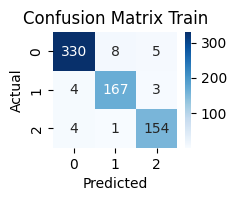

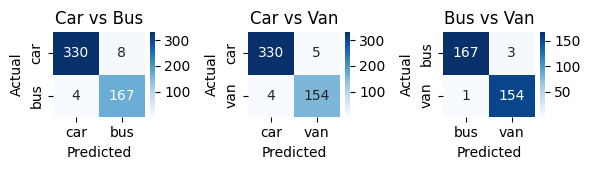

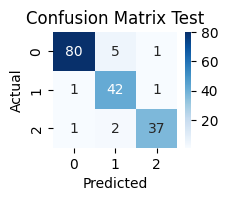

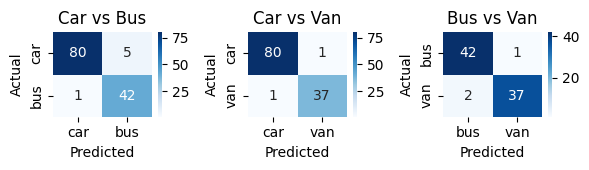


Classification Report Train
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       343
           1       0.95      0.96      0.95       174
           2       0.95      0.97      0.96       159

    accuracy                           0.96       676
   macro avg       0.96      0.96      0.96       676
weighted avg       0.96      0.96      0.96       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        86
           1       0.86      0.95      0.90        44
           2       0.95      0.93      0.94        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.93       170
weighted avg       0.94      0.94      0.94       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.963018   0.958604  0.963474  0.960983  0.998297
Test   

In [127]:
# SVM with a non lineare kernel (but radial) to check if it can capture non linear pattern in silhouette
svm_reg = SVC(kernel="linear",probability=True, random_state=3)

# Fitting
svm_reg.fit(X_train_scaled, y_train)

# SVM Model regularized Evaluation
evaluate_model(svm_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM', 'Reg')

**Note**: The regularized SVM achieves solid performance, with training accuracy (0.963) and test accuracy (0.935). Precision, recall, and F1-score remain consistently high across classes, and ROC AUC is excellent on both train (0.998) and test (0.989), confirming strong discriminative ability.

Compared to the basic version, the model shows a slightly larger gap between training and test metrics, with a few additional misclassifications—particularly between cars and buses. This reflects the sensitivity of the linear margin to subtle variations in the feature space.

While the linear boundary captures the main separations effectively, it remains somewhat less robust than the non-linear tree-based models. Even so, the overall F1-score (0.931 on test) highlights stable and reliable generalization.

Overall, the regularized SVM provides a strong margin-based classifier, offering competitive performance while remaining more interpretable than the ensemble methods.

###6.7 **Gradient Boosting Evaluation**

####6.7.1 **Basic**

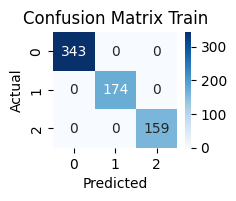

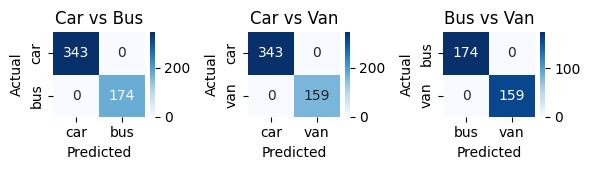

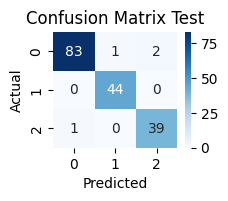

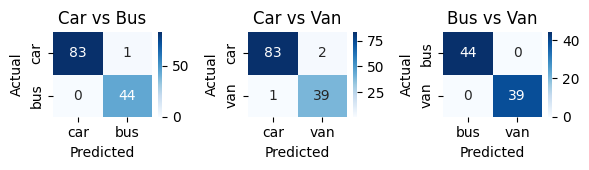


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.98      1.00      0.99        44
           2       0.95      0.97      0.96        40

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  1.000000   1.000000  1.000000  1.000000  1.000000
Test   

In [128]:
# Gradient Boosting Model Evaluation
evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Gradient Boosting', 'Basic')

**Note**: The basic Gradient Boosting model achieves very strong performance, with perfect scores on the training set and accuracy/F1 of 0.98 on the test set. Precision, recall, and F1-score remain consistently high across all classes.

Cars are classified with near-perfect precision, buses reach perfect recall, and vans maintain strong balance between precision and recall. These results confirm the model's ability to capture subtle non-linear patterns in the silhouette features.

The small gap between training and test performance indicates excellent generalization, with only minor misclassifications—primarily between cars and vans. ROC AUC is nearly perfect on both train (1.0) and test (0.998), further highlighting the model's strong discriminative ability.

Overall, Gradient Boosting provides a powerful and reliable baseline, delivering one of the most accurate and stable performances in the evaluation.

####6.7.2 **Regularized**

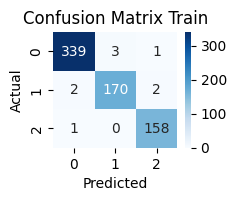

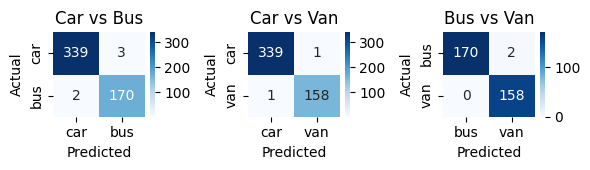

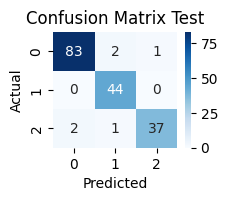

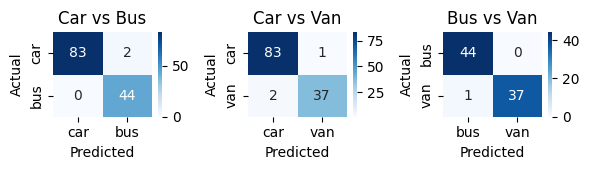


Classification Report Train
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       343
           1       0.98      0.98      0.98       174
           2       0.98      0.99      0.99       159

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.94      1.00      0.97        44
           2       0.97      0.93      0.95        40

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  0.986686   0.985084  0.986353  0.985703  0.999769
Test   

In [129]:
# Gradient Boosting Regularized
gb_reg = GradientBoostingClassifier(n_estimators=150, learning_rate=0.02, max_depth=3, random_state=3)

# Fitting
gb_reg.fit(X_train_scaled, y_train)

# Gradient Boosting Model regularized Evaluation
evaluate_model(gb_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'Gradient Boosting', 'Reg')

**Note**: The regularized Gradient Boosting model maintains high performance, with training accuracy at 0.99 and test accuracy at 0.96. Precision, recall, and F1-score remain strong across all classes, and ROC AUC stays excellent on both train and test.

Compared to the unregularized version, performance is slightly lower but more stable, with a narrower gap between training and test metrics. Misclassifications remain minimal and mostly involve the car-van boundary.

Overall, this regularized variant offers a well-balanced and reliable alternative with strong generalization.

###6.8 **XGBoost Evaluation**

####6.8.1 **Basic**

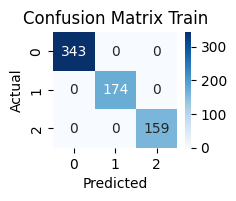

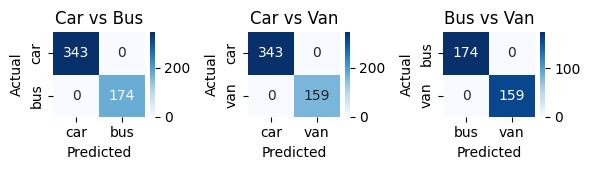

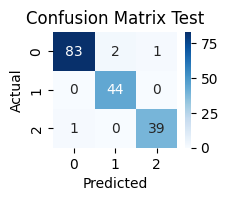

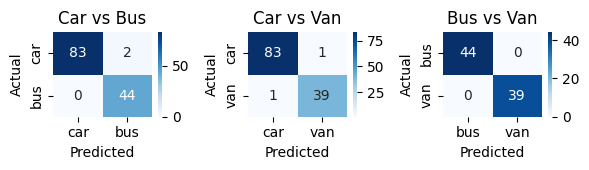


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.96      1.00      0.98        44
           2       0.97      0.97      0.97        40

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score   ROC AUC
Train  1.000000   1.000000  1.000000  1.000000  1.000000
Test   

In [130]:
# XGBoost Model Evaluation
evaluate_model(xg_model, X_train_scaled, y_train, X_test_scaled, y_test, 'XGBoost', 'Basic')

**Note**: The basic XGBoost model achieves very strong performance, with perfect scores on the training set and accuracy/F1 of 0.98 on the test set. Precision, recall, and F1-score remain consistently high across all classes.

The model captures complex patterns effectively and maintains low bias, with only a small gap between training and test performance. Most misclassifications occur between cars and vans, while buses are classified with near-perfect reliability.

Overall, XGBoost provides a powerful and stable baseline, delivering excellent generalization with minimal errors.

####6.8.2 **Regularized**

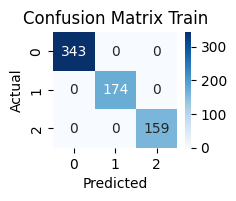

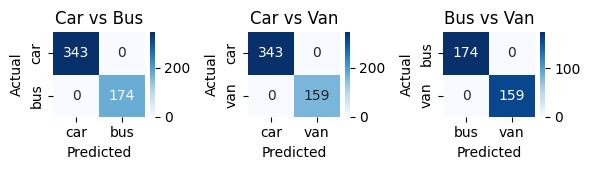

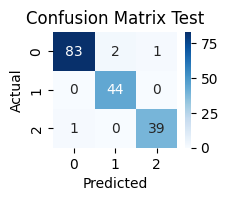

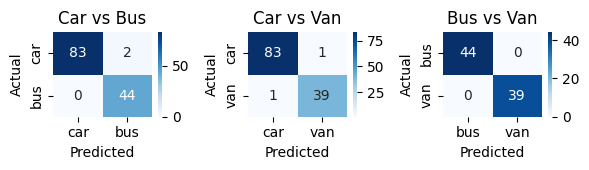


Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.96      1.00      0.98        44
           2       0.97      0.97      0.97        40

    accuracy                           0.98       170
   macro avg       0.97      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

------------------------------------------------------------
       Accuracy  Precision    Recall  F1-Score  ROC AUC
Train  1.000000   1.000000  1.000000  1.000000   1.0000
Test   0.

In [131]:
# XGBoost Regularized
xg_reg = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=3)

# Fitting
xg_reg.fit(X_train_scaled, y_train)

# XGBoost Model regularized Evaluation
evaluate_model(xg_reg, X_train_scaled, y_train, X_test_scaled, y_test, 'XGBoost', 'Reg')

**Note**: The regularized XGBoost model achieves outstanding performance, with perfect scores on the training set and excellent generalization on the test set (accuracy 0.98, F1-score 0.98, ROC AUC 0.998). Training and test metrics remain closely aligned, confirming that regularization effectively controls overfitting.

Misclassifications are minimal and mostly involve the car-van boundary, while buses are consistently recognized with perfect recall. Overall, this regularized variant stands out as one of the most powerful and reliable models in the evaluation, combining high accuracy with strong stability.

###6.9 **Metric Comparison**

In [132]:
# Display all evaluation metrics as an HTML table
display(HTML(summary_df.to_html(escape=False)))

**Note**: The summary table reports train and test metrics for all models and their Basic / Regularized variants.

Using F1-score as the primary metric, ensemble methods (Random Forest, Gradient Boosting, XGBoost) consistently achieve the highest values, showing excellent generalization and minimal misclassification.

Margin-based models such as SVM and Logistic Regression also perform strongly, with stable F1-scores and high ROC AUC, confirming their reliability on this dataset.

Simpler models like Decision Tree and kNN show lower test performance and a higher tendency to overfit, especially in their basic configurations.

Across all methods, confusion matrices reveal that the remaining errors are concentrated mainly in the car-van boundary, which represents the most challenging separation in the dataset.

###6.10 **Cross-Validation**

####6.10.1 **Individual Model Cross-Validation**

##### **Decision Tree**


In [133]:
# apply cross-validation to the Decision Tree Basic
print('Decision Tree Basic')
cv_dt = cross_validation_evaluation(dt_model, X_train_scaled, y_train, cv=5)
update_cv_summary('Decision Tree', cv_dt)

print('-' * 67)

# apply cross-validation model regularized
print('Decision Tree Regularized')
cv_dt_reg = cross_validation_evaluation(dt_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('Decision Tree Reg', cv_dt_reg)


Decision Tree Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.886144    0.88136  0.883995  0.881356  0.911113
-------------------------------------------------------------------
Decision Tree Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.884662    0.88644  0.870148  0.876214  0.932842


**Note**:
Cross-validation metrics for both the basic and regularized Decision Tree are lower than the train and test scores, but they provide a more realistic estimate of the model's generalization ability.

- For the basic version, the F1-score (0.881) confirms decent performance but highlights variability across folds.

- With regularization, the F1-score (0.876) remains similar, while ROC AUC improves noticeably (0.93 vs. 0.91), indicating stronger discriminative ability.

These results show that although Decision Trees can perform well on single train/test splits, their stability across folds is limited. Regularization helps reduce overfitting and improves reliability, making the F1-score a fairer basis for comparison with more advanced models.

##### **Random Forest**

In [134]:
# apply cross-validation
print('Random Forest Basic')
cv_rf = cross_validation_evaluation(rf_model, X_train_scaled, y_train, cv=5)
update_cv_summary('Random Forest', cv_rf)

print('-' * 67)

# apply cross-validation model regularized
print('Random Forest Regularized')
cv_rf_reg = cross_validation_evaluation(rf_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('Random Forest Reg', cv_rf_reg)

Random Forest Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.951166   0.945536  0.954428  0.949083  0.994369
-------------------------------------------------------------------
Random Forest Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.952647   0.947773  0.954224  0.950028  0.994498


**Note**: Cross-validation results confirm the strong and stable performance of the Random Forest models.

- For the basic version, the F1-score (0.95) and ROC AUC (0.99) demonstrate excellent generalization across folds.
- The regularized version achieves nearly identical results, with F1-score (0.95) and ROC AUC (0.99), showing that the model remains robust and reliable regardless of minor parameter adjustments.

These findings highlight that Random Forest maintains high accuracy and balanced precision/recall across different subsets of the data, making it one of the most consistent models in the evaluation.

##### **Logistic Regression**

In [135]:
# apply cross-validation
print('Logistic Regression Basic')
cv_lr = cross_validation_evaluation(lr_model, X_train_scaled, y_train, cv=5)
update_cv_summary('Logistic Regression', cv_lr)

print('-' * 67)

# apply cross-validation model regularized
print('Logistic Regression Regularized')
cv_lr_reg = cross_validation_evaluation(lr_model_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('Logistic Regression Reg', cv_lr_reg)

Logistic Regression Basic
                  Accuracy  Precision    Recall  F1-Score  ROC AUC
Cross Validation  0.948214   0.943908  0.945939  0.944069  0.99477
-------------------------------------------------------------------
Logistic Regression Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.946754   0.944166  0.944714  0.943124  0.993381


**Note**: Note: Cross-validation results confirm that Logistic Regression maintains strong and stable performance across folds.

For the basic version, the F1-score (0.94) and ROC AUC (0.995) indicate excellent generalization.
The regularized version achieves nearly identical results, with F1-score (0.94) and ROC AUC (0.993), showing that L1 regularization does not compromise stability and continues to capture the most discriminative features.

These findings highlight that Logistic Regression provides a reliable linear baseline, with consistent performance across different subsets of the data, even if slightly less powerful than Random Forest.

##### **kNN**

In [136]:
# apply cross-validation
print('kNN Basic')
cv_knn = cross_validation_evaluation(knn_model, X_train_scaled, y_train, cv=5)
update_cv_summary('kNN', cv_knn)

print('-' * 67)

print('kNN Regularized')
# apply cross-validation model regularized
cv_knn_reg = cross_validation_evaluation(knn_model_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('kNN Reg', cv_knn_reg)

kNN Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.915752   0.902859  0.914581  0.907886  0.980335
-------------------------------------------------------------------
kNN Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.892081   0.885068  0.882666  0.882521  0.978938


**Note**: Cross-validation results show that k-Nearest Neighbors achieves reasonably strong performance, but with lower stability compared to tree-based models and logistic regression.

For the baseline (k=5), the F1-score (0.91) and ROC AUC (0.98) confirm good generalization, though some variability remains across folds.

With regularization (k=15, distance weighting), the F1-score decreases slightly (0.88), while ROC AUC remains high (0.98). This indicates improved stability but at the cost of overall performance.

These findings highlight that kNN can classify vehicle types effectively, but its sensitivity to dataset size and feature noise makes it less consistent than more robust models such as Random Forest.

#####**SVM**

In [137]:
# apply cross-validation
print('SVM Basic')
cv_svm = cross_validation_evaluation(svm, X_train_scaled, y_train, cv=5)
update_cv_summary('SVM', cv_svm)

print('-' * 67)

# apply cross-validation model regularized
print('SVM Regularized')
cv_svm_reg = cross_validation_evaluation(svm_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('SVM Reg', cv_svm_reg)


SVM Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.958573   0.952485  0.958362  0.954582  0.996194
-------------------------------------------------------------------
SVM Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.946754   0.942851  0.948145  0.944396  0.996128


**Note**: Cross-validation results confirm that both SVM variants deliver strong and stable performance.

The basic version achieves an F1-score of 0.954 and ROC AUC of 0.996, while the regularized version produces nearly identical results (F1-score 0.944, ROC AUC 0.996).

These findings highlight that SVM generalizes consistently across folds, with only minimal differences between linear and regularized configurations.

Overall, SVM provides a reliable margin-based classifier, performing on par with Random Forest in terms of generalization.

#####**Gradient Boosting**

In [138]:
# apply cross-validation
print('Gradient Boosting Basic')
v_gb = cross_validation_evaluation(gb_model, X_train_scaled, y_train, cv=5)
update_cv_summary('Gradient Boosting', cv_gb)

print('-' * 67)

# apply cross-validation model regularized
print('Gradient Boosting Regularized')
cv_gb_reg = cross_validation_evaluation(gb_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('Gradient Boosting Reg', cv_gb_reg)

Gradient Boosting Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.946732    0.94313  0.946994  0.944308  0.993011
-------------------------------------------------------------------
Gradient Boosting Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.926024   0.920997  0.929737  0.924067  0.989368


**Note**: Cross-validation results confirm that Gradient Boosting delivers strong and stable performance across folds.
The baseline model achieves an F1-score of 0.944 and a ROC AUC of 0.993, showing excellent generalization and very low variance.

The regularized version performs slightly worse (F1-score 0.924, ROC AUC 0.989), indicating that regularization reduces model complexity but also leads to a small loss in predictive power. Despite this, performance remains high and consistent across folds.

Overall, Gradient Boosting stands as one of the most reliable algorithms in the evaluation, with the baseline variant offering the best balance between accuracy and discriminative ability.

##### **XGBoost**

In [139]:
# apply cross-validation
print('XGBoost Basic')
cv_xg = cross_validation_evaluation(xg_model, X_train_scaled, y_train, cv=5)
update_cv_summary('XGBoost', cv_xg)

print('-' * 67)

print('XGBoost Regularized')
# apply cross-validation model regularized
cv_xg_reg = cross_validation_evaluation(xg_reg, X_train_scaled, y_train, cv=5)
update_cv_summary('XGBoost Reg', cv_xg_reg)

XGBoost Basic
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.952647   0.946839  0.954032  0.950039  0.994064
-------------------------------------------------------------------
XGBoost Regularized
                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Cross Validation  0.951198   0.946247  0.951962  0.948554  0.994205


**Note**: Cross-validation results confirm that XGBoost delivers strong and consistent performance.

The baseline model achieves an F1-score of 0.950 and ROC AUC of 0.994, while the regularized version produces nearly identical results (F1-score 0.948, ROC AUC 0.994).

These findings highlight that XGBoost generalizes very well, with minimal differences between basic and regularized configurations.

Regularization provides additional stability, ensuring reliable performance without sacrificing discriminative power.

####6.10.2 **Cross-Validation Summary**

In [140]:
# Cross-validation summary table
cv_summary_df

,Model,CV_Accuracy,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC
0,Decision Tree,0.886144,0.881360,0.883995,0.881356,0.911113
1,Decision Tree Reg,0.884662,0.886440,0.870148,0.876214,0.932842
2,Random Forest,0.951166,0.945536,0.954428,0.949083,0.994369
3,Random Forest Reg,0.952647,0.947773,0.954224,0.950028,0.994498
4,Logistic Regression,0.948214,0.943908,0.945939,0.944069,0.994770
5,Logistic Regression Reg,0.946754,0.944166,0.944714,0.943124,0.993381
6,kNN,0.915752,0.902859,0.914581,0.907886,0.980335
7,kNN Reg,0.892081,0.885068,0.882666,0.882521,0.978938
8,SVM,0.958573,0.952485,0.958362,0.954582,0.996194
9,SVM Reg,0.946754,0.942851,0.948145,0.944396,0.996128


**Note**: Cross-validation (cv=5) provides an additional check on model robustness.

F1-score trends confirm that Random Forest, Logistic Regression, SVM, Gradient Boosting, and XGBoost achieve the strongest and most stable performance, while Decision Tree and kNN remain less consistent.

###6.11 **Stacking**

**Note**: Stacking was also evaluated, but results did not show clear improvements over the best individual models.

Given that Random Forest, SVM, and XGBoost already achieve very high F1-scores and robust generalization, stacking adds complexity without delivering significant gains.

In [141]:
# Applying Stacking
# Base learners
rf = RandomForestClassifier(n_estimators=50, random_state=3)
gb = GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,max_depth=3, random_state=3)
svm = SVC(probability=True, kernel = 'linear', random_state=3)
xg = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=3)

# Meta learner (linear, to avoid overfitting)
meta = LogisticRegression(max_iter=1000, random_state=3)

# Stacking ensemble
stack_model = StackingClassifier(estimators=[('rf', rf), ('gb', gb), ('svm', svm),('xg', xg)], final_estimator=meta, cv=5, stack_method='predict_proba')

# Fitting
stack_model.fit(X_train_scaled, y_train)
y_pred = stack_model.predict(X_test_scaled)

# Printing Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.98      1.00      0.99        44
           2       1.00      0.97      0.99        40

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170



**Note**: Stacking was evaluated with Logistic Regression as meta-learner.

Results achieved very high accuracy (0.99) and F1-scores (0.99), confirming that the ensemble can exploit the strengths of the base models.

However, improvements over the best individual models remain limited, so stacking was not considered the primary choice for deployment.

This evaluation was conducted mainly for academic completeness, rather than as a business-driven solution.

##7. **Final Summary - Model Selection**

The evaluation combined train/test metrics, confusion matrices, and cross-validation to assess robustness.

F1-score, our primary metric, confirms that models like Random Forest, Gradient Boosting, XGBoost, together with Logistic Regression and SVM, achieve the strongest and most stable performance.

Simpler models Decision Tree and kNN show lower F1-scores and are more prone to overfitting.

Among all candidates, Random Forest consistently delivers the best balance:

- High accuracy and F1-score on both train and test sets
- Near-perfect ROC AUC
- Minimal and balanced misclassifications
- Robust cross-validation results aligned with test metrics

**Random Forest** is therefore selected as the most reliable choice for deployment in the Prospect Auto use case.

As an alternative, SVM also shows excellent F1-scores and generalization, and may be preferred when faster prediction speed is prioritized over interpretability.